In [1]:
import pandas as pd
import numpy as np 
from pathlib import Path
import matplotlib.pyplot as plt 

In [3]:
#Loads in Path
categories_csv = Path("Resources/amazon_categories.csv")
products_csv = Path("Resources/amazon_products.csv")

#Reads in file 
categories_df = pd.read_csv(categories_csv)
products_df = pd.read_csv(products_csv)

In [5]:
categories_df.rename(columns={"id": "category_id"}, inplace=True)

In [7]:
all_categories_df = pd.merge(categories_df,products_df, on='category_id')

all_categories_df.head()

,category_id,category_name,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,isBestSeller,boughtInLastMonth
0,1,Beading & Jewelry Making,B08YNTXFJG,Duufin 120 Pieces Acrylic Keychain Blanks Set ...,https://m.media-amazon.com/images/I/71czFH2QUM...,https://www.amazon.com/dp/B08YNTXFJG,4.7,510,9.99,0.0,False,50
1,1,Beading & Jewelry Making,B08DXSF5PZ,"DIY Tray Silicone Resin Mold, Oval Epoxy Resin...",https://m.media-amazon.com/images/I/71ZnrCHA49...,https://www.amazon.com/dp/B08DXSF5PZ,4.6,584,8.99,0.0,False,0
2,1,Beading & Jewelry Making,B096JGXQN5,"GTOTd I Love Rock and Roll Pins Set(18 Pack,2....",https://m.media-amazon.com/images/I/71SOJXp-wJ...,https://www.amazon.com/dp/B096JGXQN5,4.5,245,12.79,0.0,False,50
3,1,Beading & Jewelry Making,B0BZXW1ZGS,Xuhal 100 Pack Plastic Ring Sizer Bulk Reusabl...,https://m.media-amazon.com/images/I/81qD7tFV+r...,https://www.amazon.com/dp/B0BZXW1ZGS,5.0,1,16.99,0.0,False,0
4,1,Beading & Jewelry Making,B0BR8B472F,"Large Dice Resin Molds, 2 Styles Silicone Dice...",https://m.media-amazon.com/images/I/71uDVuhf71...,https://www.amazon.com/dp/B0BR8B472F,4.4,10,15.99,0.0,False,50


In [9]:
#Groups the data by category name 
reducedColumns = ["category_name","stars","reviews"]

clean_category_df = all_categories_df[reducedColumns]
clean_category_df = clean_category_df[clean_category_df['stars'] > 0]

clean_category_df.head()

,category_name,stars,reviews
0,Beading & Jewelry Making,4.7,510
1,Beading & Jewelry Making,4.6,584
2,Beading & Jewelry Making,4.5,245
3,Beading & Jewelry Making,5.0,1
4,Beading & Jewelry Making,4.4,10


In [11]:
clean_category_df["stars"].min()

1.0

# Highest/Lowest Rated Categories

In [13]:
stars_per_category = clean_category_df.groupby(['category_name']).mean()

stars_per_category.head()

,stars,reviews
category_name,,
Abrasive & Finishing Products,4.383120,0.407902
Accessories & Supplies,4.482169,0.000000
Additive Manufacturing Products,4.262980,174.381373
Arts & Crafts Supplies,4.522590,657.358505
"Arts, Crafts & Sewing Storage",4.418593,0.000000


In [17]:
highest_rated_categories = stars_per_category.sort_values(by="stars", ascending=False)

#Creates a variable for the max 10 category name with stars 
top_10 = highest_rated_categories.head(10)

#Creates a variable for the max 10 category name with stars 
bottom_10 = highest_rated_categories.tail(10)

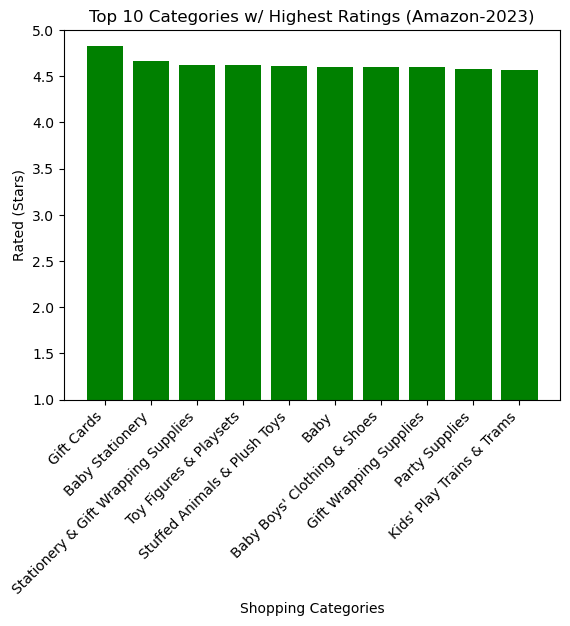

In [91]:
x_axis = top_10.index
y_axis = top_10["stars"]
tick_locations = list(range(len(x_axis))) 

#plots the bar chart
plt.bar(tick_locations, y_axis, color="green")

#plots the x_axis using tick_locations and horizontally aligns them to the right
plt.xticks(tick_locations, x_axis, rotation=45, ha="right")
plt.yticks(np.arange(1, 5.1, 0.5))  
plt.ylim(1, 5.0)  

plt.title("Top 10 Categories w/ Highest Ratings (Amazon-2023)")
plt.xlabel("Shopping Categories")
plt.ylabel("Rated (Stars)");

plt.savefig("highest_10_category_ratings.png", format="png", bbox_inches="tight")

plt.show()

            

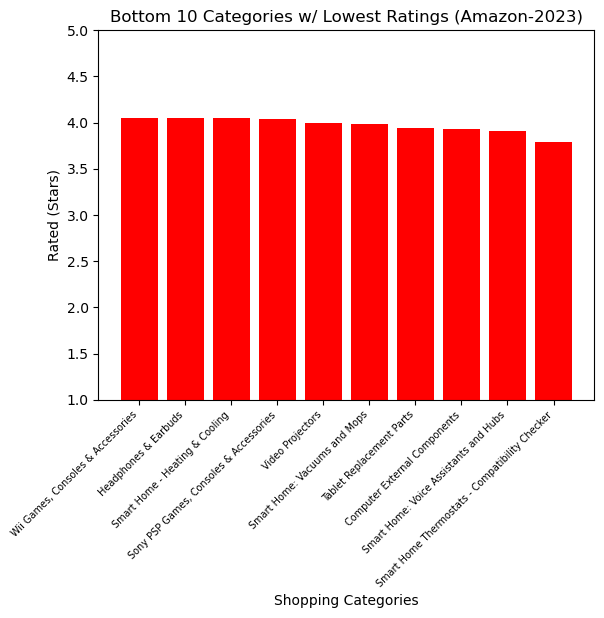

In [89]:
x_axis = bottom_10.index
y_axis = bottom_10["stars"]
tick_locations = list(range(len(x_axis))) 

#plots the bar chart
plt.bar(tick_locations, y_axis, color="red");

#plots the x_axis using tick_locations and horizontally aligns them to the right
plt.xticks(tick_locations, x_axis, rotation=45, ha="right",fontsize=7);
plt.yticks(np.arange(1, 5.1, 0.5))  
plt.ylim(1, 5.0)  


plt.title("Bottom 10 Categories w/ Lowest Ratings (Amazon-2023)")
plt.xlabel("Shopping Categories")
plt.ylabel("Rated (Stars)");

plt.savefig("lowest_10_category_ratings.png", format="png", bbox_inches="tight")

plt.show()

# Distribution of Ratings Across Highest Rated Categories

In [28]:
highest_rated_categories.head(10)

,stars,reviews
category_name,,
Gift Cards,4.832374,0.0
Baby Stationery,4.666591,0.0
Stationery & Gift Wrapping Supplies,4.626097,0.0
Toy Figures & Playsets,4.619361,0.0
Stuffed Animals & Plush Toys,4.610480,0.0
Baby,4.604395,0.0
Baby Boys' Clothing & Shoes,4.599311,0.0
Gift Wrapping Supplies,4.597859,0.0
Party Supplies,4.574411,0.0


## Category - Gift Cards

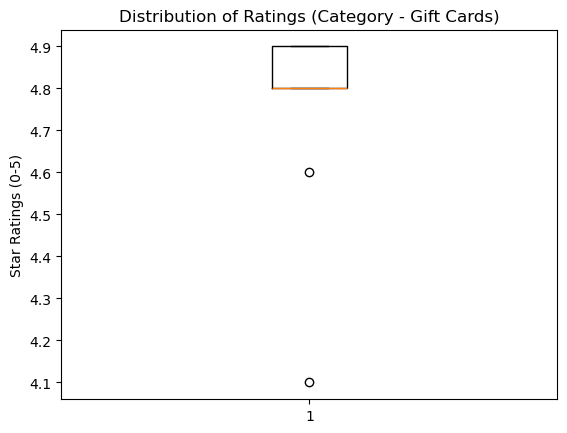

In [69]:
#Locates the rows where category_name = Gift Cards
gift_cards = clean_category_df.loc[clean_category_df['category_name'] == 'Gift Cards']
#print(indus_and_sci_cat)

fig1, ax1 = plt.subplots() 
ax1.set_title("Distribution of Ratings (Category - Gift Cards)")
ax1.set_ylabel("Star Ratings (0-5)")
ax1.boxplot(gift_cards['stars'])

plt.savefig("gift_cards.png", format="png")

plt.show()


## Category - Baby

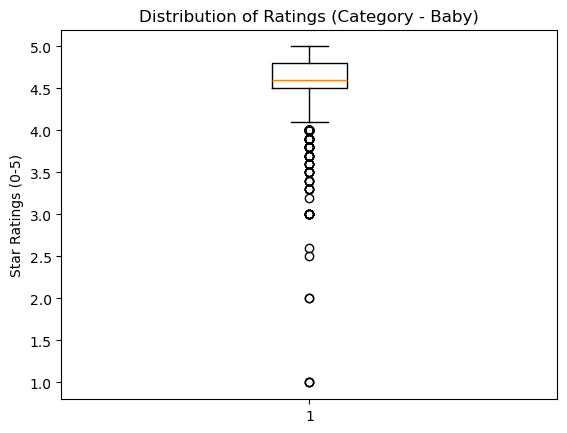

In [71]:
#Locates the rows where category_name = Baby
baby_cat = clean_category_df.loc[clean_category_df['category_name'] == 'Baby']
#print(indus_and_sci_cat)

fig1, ax1 = plt.subplots() 
ax1.set_title("Distribution of Ratings (Category - Baby)")
ax1.set_ylabel("Star Ratings (0-5)")
ax1.boxplot(baby_cat['stars'])

plt.savefig("baby.png", format="png")
plt.show()

## Category - Party Supplies

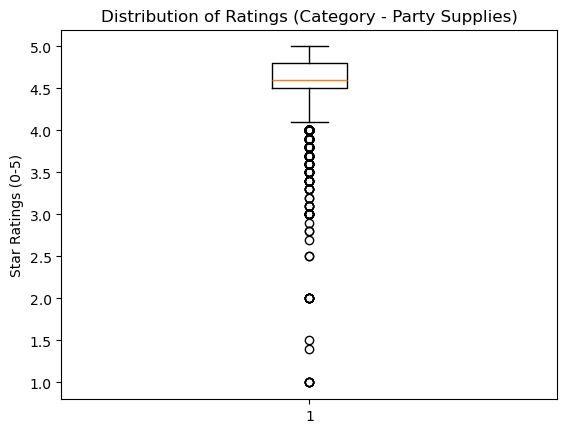

In [73]:
#Locates the rows where category_name = Party Supplies
party_supplies = clean_category_df.loc[clean_category_df['category_name'] == 'Party Supplies']
#print(indus_and_sci_cat)

fig1, ax1 = plt.subplots() 
ax1.set_title("Distribution of Ratings (Category - Party Supplies)")
ax1.set_ylabel("Star Ratings (0-5)")
ax1.boxplot(party_supplies['stars'])

plt.savefig("party_supp.png", format="png")
plt.show()

# Distribution of Ratings Across Lowest Rated Categories

In [37]:
highest_rated_categories.tail(10)

,stars,reviews
category_name,,
"Wii Games, Consoles & Accessories",4.053880,0.000000
Headphones & Earbuds,4.052966,1130.225479
Smart Home - Heating & Cooling,4.049265,0.000000
"Sony PSP Games, Consoles & Accessories",4.041321,0.000000
Video Projectors,3.993663,0.000000
Smart Home: Vacuums and Mops,3.987013,0.000000
Tablet Replacement Parts,3.940326,0.050238
Computer External Components,3.934652,1.215228
Smart Home: Voice Assistants and Hubs,3.907143,2775.523810


## Category - Smart Home Thermostats - Compatibility Checker

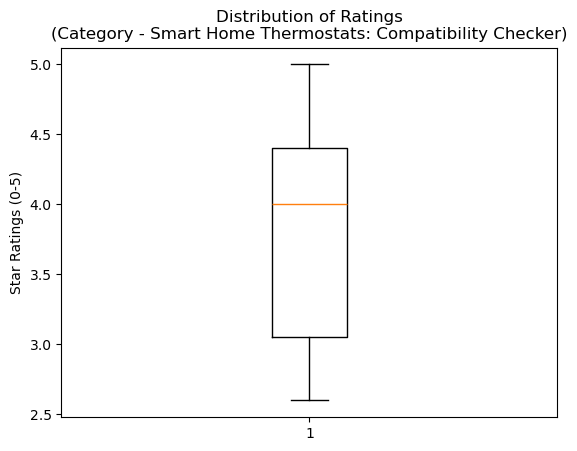

In [87]:
#Locates the rows where category_name = Smart Home Thermostats - Compatibility Checker
smart_home = clean_category_df.loc[clean_category_df['category_name'] == 'Smart Home Thermostats - Compatibility Checker']


fig1, ax1 = plt.subplots() 
ax1.set_title("Distribution of Ratings\n(Category - Smart Home Thermostats: Compatibility Checker)")
ax1.set_ylabel("Star Ratings (0-5)")
ax1.boxplot(smart_home['stars'])

plt.savefig("smart_homee.png", format="png")
plt.show()

## Category - Tablet Replacement Parts

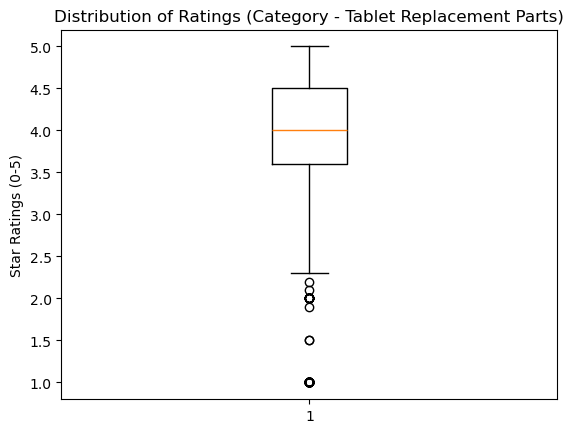

In [82]:
#Locates the rows where category_name = Tablet Replacement Parts
tablet_replace = clean_category_df.loc[clean_category_df['category_name'] == 'Tablet Replacement Parts']


fig1, ax1 = plt.subplots() 
ax1.set_title("Distribution of Ratings (Category - Tablet Replacement Parts)")
ax1.set_ylabel("Star Ratings (0-5)")
ax1.boxplot(tablet_replace['stars'])

plt.savefig("tablet_replacement.png", format="png")
plt.show()

## Category - Headphones & Earbuds

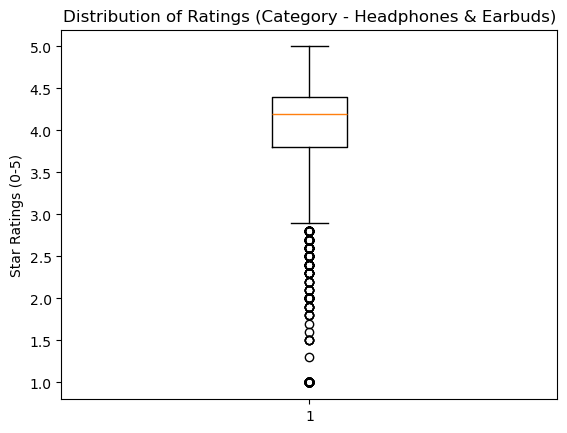

In [84]:
#Locates the rows where category_name = Headphones & Earbuds
headphones_ears = clean_category_df.loc[clean_category_df['category_name'] == 'Headphones & Earbuds']


fig1, ax1 = plt.subplots() 
ax1.set_title("Distribution of Ratings (Category - Headphones & Earbuds)")
ax1.set_ylabel("Star Ratings (0-5)")
ax1.boxplot(headphones_ears['stars'])

plt.savefig("headphones.png", format="png")
plt.show()